In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

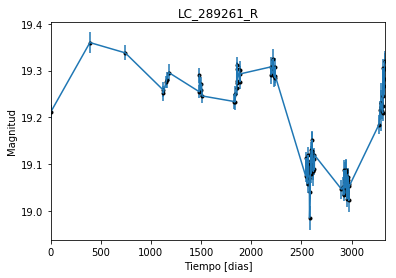

In [2]:
data = np.genfromtxt('LC_289261_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_289261_R')
plt.savefig("LC_289261_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

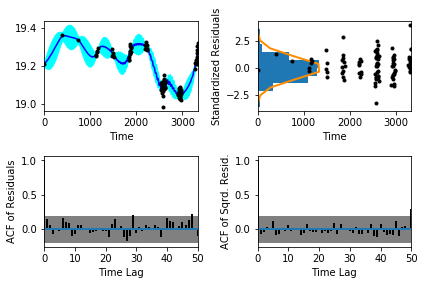

In [5]:
sample.assess_fit()

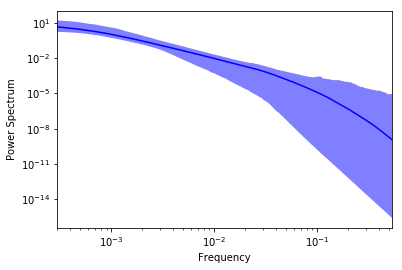

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

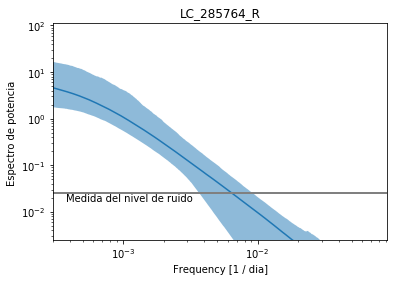

In [27]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_R')

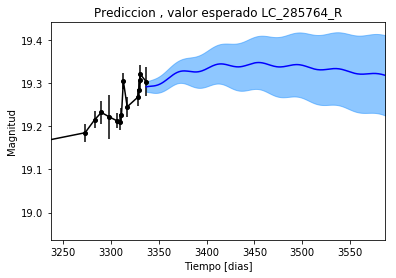

In [28]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_R')

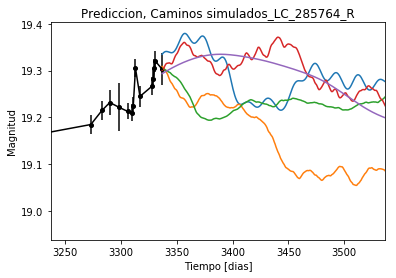

In [29]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_R')

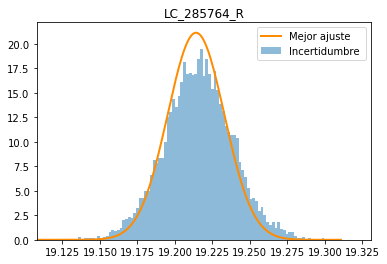

In [30]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_R')
plt.savefig("Mejor_ajuste_LC_285764_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_R')

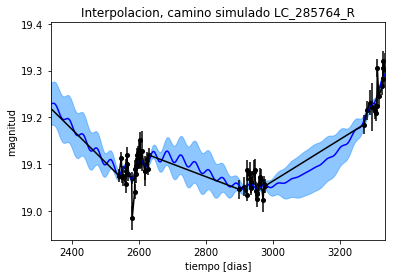

In [31]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_R')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_R')

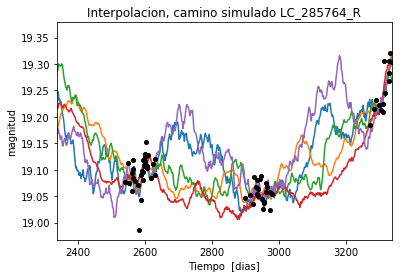

In [32]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 496.009679725
Median: 0.0316050700587
Standard deviation: 0.226836016756
68% credibility interval: [ 0.00165123  0.296616  ]
95% credibility interval: [  3.93310672e-04   8.58788910e-01]
99% credibility interval: [  3.34242530e-04   1.02583992e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1407.45501373
Median: 0.0137871117583
Standard deviation: 0.131850719084
68% credibility interval: [ 0.00070683  0.10821603]
95% credibility interval: [  3.46855587e-04   4.85196359e-01]
99% credibility interval: [  3.11061923e-04   8.36633438e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 208.04814063
Median: 0.0675148668949
St

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1482.92406802
Median: 279.736000079
Standard deviation: 1.9613224687
68% credibility interval: [ 277.3883935   281.00312295]
95% credibility interval: [ 274.29541092  281.74637897]
99% credibility interval: [ 272.2614222   282.30991107]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 336.467707224
Median: 1.39412321357
Standard deviation: 2.91182637576
68% credibility interval: [ 0.12381557  5.58833561]
95% credibility interval: [  0.0181944   10.32002275]
99% credibility interval: [  1.09394492e-02   1.37113521e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 293.664089639
Median: 3.0952665125
Standard deviation: 14.5340333004
68% credibility interval: [  0.13683066  22.09650317]
95% credibility interval: [  1.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10372.5703679
Median: 4.70307643961e-46
Standard deviation: 320733385716.0
68% credibility interval: [  6.04669200e-113   9.88190840e-021]
95% credibility interval: [  4.90003819e-151   2.68179427e-002]
99% credibility interval: [  6.90231343e-209   1.55433745e+002]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2148.31007655
Median: 19.2393118962
Standard deviation: 0.0478024197158
68% credibility interval: [ 19.19921953  19.28375708]
95% credibility interval: [ 19.14907282  19.33643415]
99% credibility interval: [ 19.10369171  19.37953438]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 433.130146047
Median: 0.112303865668
Standard deviation: 0.305310772524
68% credibility interval: [ 0.         0.6169204]
95% credibility interval: [ 0.          1.00069178]
99% credibility interval: [ 0.          1.05689138]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 433.130146047
Median: 0.112303865668
Standard deviation: 0.305310772524
68% credibility interval: [ 0.         0.6169204]
95% credibility interval: [ 0.          1.00069178]
99% credibility interval: [ 0.          1.05689138]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 568.138867035
Median: 0.0
Standard deviation: 0.000194841347075
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1482.92406802
Median: 279.736000079
Standard deviation: 1.9613224687
68% credibility interval: [ 277.3883935   281.00312295]
95% credibility interval: [ 274.29541092  281.74637897]
99% credibility interval: [ 272.2614222   282.30991107]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2062.3898662
Median: 0.00930575894395
Standard deviation: 0.00801062693592
68% credibility interval: [ 0.00625947  0.01512552]
95% credibility interval: [ 0.00457488  0.02868332]
99% credibility interval: [ 0.00374094  0.05483619]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 879.572735431
Median: 1.13297381772
Standard deviation: 0.173776699896
68% credibility interval: [ 0.97430286  1.30884898]
95% credibility interval: [ 0.83094478  1.52154959]
99% credibility interval: [ 0.74685553  1.67872498]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 417.753914376
Median: 0.0041763252084
Standard deviation: 0.21658161962
68% credibility interval: [  3.83534037e-05   8.41490895e-02]
95% credibility interval: [  1.81991002e-06   6.99958967e-01]
99% credibility interval: [  2.44314557e-07   1.52808984e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 496.009679725
Median: (-0.198580511825-5.56852113222j)
Standard deviation: 2.38983533337
68% credibility interval: [-1.86369328+0.j         -0.01037501-2.85129974j]
95% credibility interval: [ -5.39592986e+00+0.j          -2.47124383e-03-0.68865245j]
99% credibility interval: [ -6.44554229e+00+0.j          -2.10010775e-03-5.19787991j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1407.45501373
Median: (-0.0866269780282+0.120897639277j)
Standard deviation: 2.08956563915
68% credibility interval: [-0.67994138+1.87710032j -0.00444117+0.14574871j]
95% credibility interval: [ -3.04857863e+00+5.25793857j  -2.17935793e-03+0.j        ]
99% credibility interval: [ -5.25672292e+00+1.8817639j   -1.95445970e-03+0.13465316j]
Post